In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import gridspec

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

In [2]:
pp.InterpolationDef.path_to_tables = "$HOME/.cache/PROPOSAL"

In [3]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.StandardRock(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(500, 1, True)
}

cross = pp.crosssection.make_std_crosssection(**args)

## Time utility
The time utility calculates the elapsed time between two energies $E_i$ and $E_f$, using the time integral

$$ t_f = t_i - \int_{E_i}^{E_f} \frac{\mathrm{d}E}{f(E)v(E)} $$

where $f(E)$ is the average continuous loss and $v(E)$ the particle velocity. The utility using this formula is provided by `make_time`:

In [4]:
time_calc = pp.make_time(cross, args["particle_def"], True)

Alternatively, the elapsed time can be calculated using the approximation $v=c$, provided by `make_time_approximate`:

In [5]:
time_calc_approx = pp.make_time_approximate()

We also need the displacement calculator to calculate the elapsed distance between two energies. This is needed for the approximative calculation of the elapsed time

In [6]:
disp_calc = pp.make_displacement(cross, True)

Let's calculate the elapsed time to propagate an initial muon to its rest mass, depending on its initial energy (note that muon decay is not taken into account here). We'll both use the exact time calculation and the approximative time calculation:

In [7]:
E_f = args["particle_def"].mass
initial_energies = np.geomspace(1e3, 1e6, 1000)

times = []
times_approx = []

for E_i in initial_energies:
    grammage = disp_calc.solve_track_integral(E_i, E_f)
    times.append(time_calc.elapsed(E_i, E_f, grammage, args["target"].mass_density))
    times_approx.append(time_calc_approx.elapsed(E_i, E_f, grammage, args["target"].mass_density))

The results meet our expectations: For high energies, the difference between the exact and approximative calculations are negligible. Only for small initial energies, the effect that the muon does not propagate with the speed of light becomes visible in the ratio plot. Furthermore, the exact time calculation always predicts a higher elapsed time than the approximative time calculation (since $v_\mathrm{exact} < c$):

Text(0.5, 0, '$E_i \\,/\\, \\mathrm{MeV} $')

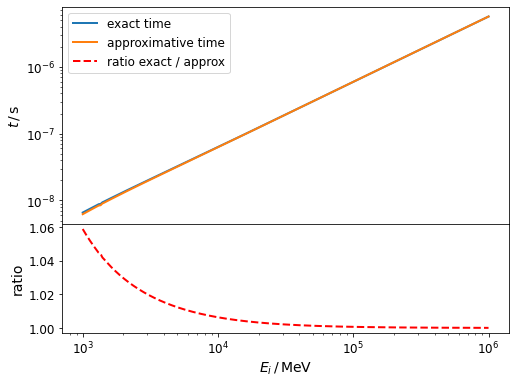

In [8]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.set_yscale("log")
ax0.set_ylabel(r'$t \,/\, \mathrm{s} $')
line0, = ax0.plot(initial_energies, times)
line1, = ax0.plot(initial_energies, times_approx)
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_ylabel(r'ratio')
line2, = ax1.plot(initial_energies, np.array(times)/np.array(times_approx), color='r', linestyle='--')
ax0.legend((line0, line1, line2), ('exact time', 'approximative time', 'ratio exact / approx'), loc='best')
plt.subplots_adjust(hspace=.0)
plt.xscale('log')
plt.xlabel(r'$E_i \,/\, \mathrm{MeV} $')
